# Plotting functions and data

We now have covered the basic elements of python and have encountered a number of built-in functions.  Let us now try to use Python for plotting. Since Python is used for a lot of different applications, we actually need to prepare it for the specific task of plotting by first executing the following three lines:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

One typical problem that comes up in many scientific disciplines is that you are asked to represent data or functions graphically. For example, you might be asked to plot the simple function $$f(x) = x^3 - x^2 - x + 3.$$ From what we learned, it seems natural that we first define this function:

In [ ]:
def f(x):
    return x**3 - x**2 - x + 3

This defines the function for arbitrary `x`. We can test that this works by evaluating it at a number of points:

In [ ]:
f(-2),f(1),f(0),f(3.5)

We can also iterate over a list of numbers and apply the function `f()` individually to each element:

In [ ]:
mylist = [-2, 1, 0, 3.5]
for i in mylist:
    print(f(i))

This agrees with what we expect.  In order to plot `f(x)` it would however be much more convenient, if we could evaluate `f()` for a list of numbers in one go, for example

    f([-2, 1, 0, 3.5])
    
however, this does not work (try it out!). The reason is that the function uses expressions like `x**3` which is not defined for normal python lists.  In order to overcome this problem, we now use a special type of lists for which mathematical operations like `x**3` *are* defined. The desired list is called a *numpy array* or simply an *array* and is provided through the Python library [numpy](http://www.numpy.org/). 

Through the above line of code 

    import numpy as np
we have imported the `numpy` library and have given it the acronym `np`.  After doing so, we can now access functions of this library. 

The fundamental objects in the `numpy` library are *arrays* of numbers.  If we have a "normal" list of numbers, we can convert it as follows:

In [ ]:
mylist = [-2, 1, 0, 3.5]
myarray = np.array(mylist)
myarray

For (numpy) arrays, the operations `myarray**2` and so on are defined by squaring simply every number in the array individually, i.e.

In [ ]:
myarray**2

This would not have worked for "normal" lists. Therefore the expression `x**3 - x**2 - x + 3` which appears above in the function `f()` makes equally sense for `x` being a number or an array. We can therefore call `f()` with an array as its argument and get back a new array as follows:

In [ ]:
f(myarray)

When we want to plot a function, we usually want to evaluate it at a number of equally spaced positions.  A useful function to generate an array with equal spacing is `np.linspace()`

In [ ]:
myxspace=np.linspace(-2,2,5)
myxspace

Here we have used a new function `linspace(start, end, number)` which takes the arguments of the startpoint, the endpoint and the number of points that you want.  Of course, `np.linspace()` does not just return a simple list, but an *array*. 

In [ ]:
myxspace**2

In [ ]:
myxspace**3

We can therefore in particular calculate `f(myxspace)` and obtain an array.

In [ ]:
f(myxspace)

When we say that we want to *plot the function*, what we really mean is that we want to evaluate the function at a number of points $x_1,\ldots,x_n$, and then connect the points $(x_1,f(x_1))$, $(x_2,f(x_2))$, and so on with straight lines. We do this by:

In [ ]:
plt.plot(myxspace,f(myxspace))

Obviously, with just five points, the result does not look very impressive, but we can easily improve by increasing the number of points and adding some labels to the axis:

In [ ]:
myxspace=np.linspace(-2,2,100)
plt.plot(myxspace,f(myxspace))
plt.xlabel("x")
plt.ylabel("f(x)")

Sometimes you might want to plot more than just one curve. You can do this by just adding extra lines as follows:

In [ ]:
myxspace=np.linspace(-2,2,100)
plt.plot(myxspace,f(myxspace))
plt.plot(myxspace,-f(myxspace))
plt.plot(myxspace,f(myxspace)-2)
plt.xlabel("x")
plt.ylabel("f(x)")

Similarly, you sometimes want to zoom in into a particular area, and you might also want to save it as a pdf file, so that you can use the figure in other documents.

In [ ]:
myxspace=np.linspace(-2,2,100)
plt.plot(myxspace,f(myxspace))
plt.plot(myxspace,-f(myxspace))
plt.plot(myxspace,f(myxspace)-2)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(-1.5,0.5)
plt.ylim(-6,6)
plt.savefig("Myfig.pdf")

In [ ]:
myxspace=np.linspace(-2,2,100)
plt.plot(myxspace,f(myxspace))
plt.plot(myxspace,-f(myxspace),linestyle="--")
plt.plot(myxspace,f(myxspace)-2,linestyle=":")
plt.xlabel("x")
plt.ylabel("f(x)")

As you can imagine, there are a lot more options for plotting that you can tune, for example you would like to add a legend to your graph, maybe you want to do bar-charts, maybe you want to add error bars or other things to your plot. All this is indeed possible in python, but it would be tedious to try to memorize all different options available. In particular since you might only use some of the many options rarely, and some of them never at all. 

The recommended approach is the following:

1. learn some of the basic plotting commands, so that you can quickly see the data for yourself
2. to make production ready nice graphs, consult the [Matplotlib examples website](http://www.matplotlib.org/gallery.html). 
3. Try to find an example of the feature you are looking for
3. run the example unchanged
4. try to understand the code that they use to implement the feature in question
5. adapt your code so that it implements the feature you are looking for. 

For example in the above graph, we might like to add a legend box, which tells us, what curve is what. If we browse through the  [Matplotlib gallery](http://www.matplotlib.org/gallery.html) a bit we might find for instance that the [legend_demo](http://matplotlib.org/examples/api/legend_demo.html) is sufficiently close to what we might want. Let's click it and we are shown a page which contains a snippet of code. Let's c&p that code into a cell and see if we can run it:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
a = b = np.arange(0,3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
plt.plot(a, c, 'k--', label='Model length')
plt.plot(a, d, 'k:', label='Data length')
plt.plot(a, c+d, 'k', label='Total message length')

legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')

plt.show()

Okay, we now have reproduced the example. The next step in the list was to try to *understand* the example. Let's go through it line by line:

    import numpy as np
    import matplotlib.pyplot as plt

When you check through the other examples on the website, you will notice that they mostly start with these two lines. As explained before, this makes the two libraries [numpy](http://www.numpy.org/) and [matplotlib](http://matplotlib.org/) available for further use in python. `numpy` is a library which deals with arrays of numbers (the function `linarray` we used above was part of `numpy`).


    # Make some fake data.
    a = b = np.arange(0,3, .02)

here we use a function in the `numpy` library called `arange` which produces a (numpy) array with the 150 numbers `[0, 0.2, ..., 2.98 ]` and assigns it to both `a` and `b`. We could replace this line with `a = b = np.linspace(0, 3, 150, endpoint=False)`. Note that the `np` here refers to the name we choose when numpy was imported in the first line. 

    c = np.exp(a)
    
This yields a new array `c` by applying the exponent to each element in `a`.
    
    d = c[::-1]
    
`d` becomes the same as `c`, except for the order being reversed. 

    # Create plots with pre-defined labels.
    plt.plot(a, c, 'k--', label='Model length')

This now plots the array in `c` at the points stored in array `a`. Note that here `plt.plot` is used, instead of simply `plot`, as we did before. Here `plt` was the acronym assigned to the matplotlib library when it was imported. `plt.plot` therefore explicitly refers to the function `plot` from the matplotlib library. The string `'k--'` refers to the style of the plot. The letter `k` refers to blac**k** (obviously, the letter `b` is already taken by **b**lue) and `--` denotes a dashed line. Instead of `'k--'` you could also say `color="black", linestyle="dashed"` if you like to make it more explicit. If you want a full explanation of all possible color codes, linestyles, etc, type three times `shift-tab` with your coursor inside the brackets of the plt.plot command. 

Finally the last optional argument `label='Model length'` is the reason why we started to look at this example in the first place, namely how to label individual curves.  Okay, this part turns out to be easy. 

    plt.plot(a, d, 'k:', label='Data length')
    plt.plot(a, c+d, 'k', label='Total message length')

These two lines should be clear now. Remember that ":" denotes dotted lines. 

    legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')

This switches on the legend box, and puts the previously defined `label`s inside. Because this is meant to be a textbook example, it also domonstrates how the fontsize position and background can be changed. You might not always need that and just get away with `plt.legend()` to switch on the legend box.  

    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('#00FFCC')
    
Again, just to show what is possible, this changes the color of the legend box to a *nicer* color, although taste is debateable ... In case you wonder what `'#00FFCC'` means, have a read up on the so-called [RGB model](https://en.wikipedia.org/wiki/RGB_color_model).

    plt.show()

This make sure that the plot is displayed. If you only need a single plot in a single notebook cell, this line is actually not needed. 

Now that we have fully understood this little textbook example, let use what we have learned to add line labels and a legend box to our previous example.  A self-contained version of our previous example would therefore be:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - x**2 - x + 3

myxspace = np.linspace(-2, 2, 100)
plt.plot(myxspace, f(myxspace), label="f(x)")
plt.plot(myxspace, -f(myxspace), linestyle="--", label="-f(x)")
plt.plot(myxspace, f(myxspace)-2, linestyle=":", label="f(x)-2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

Now we finally solved the problem of adding labels to our lines. Maybe in this case, there is still a small problem, that the labels look like text **f(x)-2**, but in this case we would prefer if it looked like the formula $f(x) -2$.  We can do this by enclosing the parts which are supposed to be formulas using dollar signs `$` as follows:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - x**2 - x + 3

myxspace = np.linspace(-2, 2, 100)
plt.plot(myxspace, f(myxspace), label=r"$f(x)$")
plt.plot(myxspace, -f(myxspace), linestyle="--", label=r"$-f(x)$")
plt.plot(myxspace, f(myxspace)-2, linestyle=":", label=r"$f(x)-2$")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.legend()

Note, that here we also introduced the notation `r"..."` which indicates that a string is considered *raw*.  This is a slightly advanced featurer, which essentially means that we tell the python parser to not pre-process the string. We will come back to this, when we deal with LaTeX. 

## Two dimensional Arrays

So far, we have used `numpy` arrays to represent essentially lists of numbers, i.e. objects, which mathematically can be loosely associated with vectors $v\in \mathbb{R}^n$.  In practice, data comes often naturally in the form of a numbers of columns (or tables), not just a single column. These tables of data can also be realised using `numpy`, for instance a table with two column and four rows is given by 

In [ ]:
A = np.array([
        [2.0, 3.0],
        [7.0, -1.0],
        [5.2, 6.1],
        [0.5, 2.1],
    ])
A

Using `A.shape` we can check that the array has the right shape,

In [ ]:
A.shape

Note that the first index in `A.shape` corresponds to the number of rows and the second index is the number of columns.  We can now access individual elements as before by addressing them as follows

In [ ]:
A[2,1], A[3,0]

Note that you can still index `A` with only a single index to refer to a particular *line* in the table:

In [ ]:
A[2]

For plotting, you would however like to select one particular *column* for example elements `A[0,0]`, `A[1,0]`, `A[2,0]` and `A[3,0]` which form the first column in the above example. In order to do this, we again use the notation with colon to address a range in a particular index, i.e.

In [ ]:
A[:,0]

We can now plot the first versus the second column in this example with 

In [ ]:
plt.plot(A[:,0],A[:,1])

Of course, what we have called *table*, can as well be called a *matrix*, and indeed we can do normal matrix aperations with `A`.  For example `A.T` refers to the transpose $A^T$ of $A$

In [ ]:
A.T

There are two ways of multiplying two matrices with each other, and therefore two symbols are used to distinguish the cases in `python`. Elementwise multiplication uses the normal `*` operation, however matrix  multiplication uses the operation `@`. For example if we want to calculate $A\cdot  A^T$ we write

In [ ]:
A @ A.T


## Plotting data from a file

One common problem is to plot data which is available in a file somewhere on your computer. For example assume that you want to plot the data of tree rings over the last 400 years in Canada. The relevant data was downloaded from the Internet at (http://www.climatedata.info/proxies/data-downloads/) and is stored in "Canada.csv" in the public directory. Copy it over to your directory. If you open this file with a text editor, for example notepad, the first and last couple of lines come up as follows:

    The copyright to the intellectual property of this file is held by www.climatedata.info
    Source,http://www.ncdc.noaa.gov/paleo/treering.html
    ,20yr-ma,Canada,Campbell,Mt Cain
    ,,,Sziecz,Parish
    1600,,872.5,720,1025
    1601,,900.5,933,868
    1602,,804.5,704,905
    1603,,788,842,734
    1604,,926,1001,851
    1605,,808,775,841
    1606,,947.5,970,925
    1607,,910.5,842,979
    1608,,931.5,854,1009
    1609,,902,898,906
    1610,915.3095238,1015,1098,932
    1611,922.3095238,948.5,982,915
    1612,925.6190476,938,952,924
    1613,932.7380952,1029.5,932,1127
    1614,934.8571429,962,888,1036
    ...
    ...
    1991,,851.5,868,835
    1992,,958,1127,789
    1993,,,,
    1994,,,,
    1995,,,,
    1996,,,,
    1997,,,,
    1998
    1999
    2000
    2001


The first two lines provide information on the source and copyright of the data. The next two lines give some information about the format of the file, the locations were the data was measured, and by whom the data was collected. Then the proper data lines start, with a typical line as follows:

    1613,932.7380952,1029.5,932,1127
    
Here we see that there are five numbers per row, which are separated by a comma "`,`". This format is called "comma separated value" format, and is usually abbreviated by "CSV". That also explains the naming convention of the file "Canada.csv".

We would like to read the data in this file into a numpy array, so that we can work with it from within python. First you should make sure that the file is located in the same directory as your notebook file. Then you should now be able to load in the data as follows:

In [2]:
A=np.genfromtxt("Canada.csv",delimiter=",",skip_header=4,skip_footer=4)

Here we have specified the comma as a delimiter. We have thrown out the first four and the last four lines of the file, as they obviously do not follow the structure of the remaining file. 

Now you can check what you have in the first line and last line:

In [3]:
print(A[0])
print(A[-1])

[ 1600.      nan   872.5   720.   1025. ]
[ 1997.    nan    nan    nan    nan]


Compare this with first and last data lines in your data file:
    1600,,872.5,720,1025
    ....
    1997,,,,

We note that numbers which are missing are represented by a number of the name "nan". This symbol is an acronym for *Not A Number* and is mostly a placeholder for something, which cannot be reasonably represented by a number. 

From the output above we see that when we were reading in the file `Canada.csv` we did not simply get a long list of numbers, but instead, the structure of rows and colomns in the file is preserved in `A`. This means that `A` is now a two-dimensional array (or matrix). We can thus access the number `720` in the first line through:

In [ ]:
A[0,3]

where `0` is now the row index and `3` is the columnindex. If you want to know, how many rows and columns the matrix `A` has you write

In [4]:
A.shape

(398, 5)

which means that we have 398 rows of data, and each row has 5 columns. We know already that we can access the first row through A[0]. If we want to access the first column (representing the year in this case), we write:

In [5]:
A[:,0]

array([ 1600.,  1601.,  1602.,  1603.,  1604.,  1605.,  1606.,  1607.,
        1608.,  1609.,  1610.,  1611.,  1612.,  1613.,  1614.,  1615.,
        1616.,  1617.,  1618.,  1619.,  1620.,  1621.,  1622.,  1623.,
        1624.,  1625.,  1626.,  1627.,  1628.,  1629.,  1630.,  1631.,
        1632.,  1633.,  1634.,  1635.,  1636.,  1637.,  1638.,  1639.,
        1640.,  1641.,  1642.,  1643.,  1644.,  1645.,  1646.,  1647.,
        1648.,  1649.,  1650.,  1651.,  1652.,  1653.,  1654.,  1655.,
        1656.,  1657.,  1658.,  1659.,  1660.,  1661.,  1662.,  1663.,
        1664.,  1665.,  1666.,  1667.,  1668.,  1669.,  1670.,  1671.,
        1672.,  1673.,  1674.,  1675.,  1676.,  1677.,  1678.,  1679.,
        1680.,  1681.,  1682.,  1683.,  1684.,  1685.,  1686.,  1687.,
        1688.,  1689.,  1690.,  1691.,  1692.,  1693.,  1694.,  1695.,
        1696.,  1697.,  1698.,  1699.,  1700.,  1701.,  1702.,  1703.,
        1704.,  1705.,  1706.,  1707.,  1708.,  1709.,  1710.,  1711.,
      

Similarly, we can access the second column (representing the 20 year moving average data of the tree ring width) through `A[:,1]`. 
Finally, a selfcontained snippet of code to plot these two colomns would be

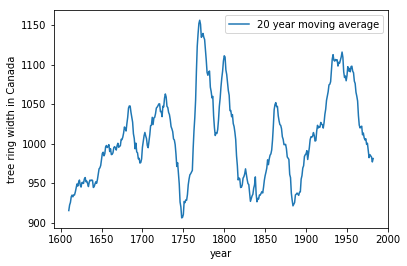

In [29]:
import numpy as np
import matplotlib.pyplot as plt

A=np.genfromtxt("Canada.csv",delimiter=",",skip_header=4,skip_footer=4)
plt.xlabel("year")
plt.ylabel("tree ring width in Canada")
plt.plot(A[:,0],A[:,1],label="20 year moving average")

plt.legend()

This is now just a plot of the data. In science, you often look for unusual of intriguing features in your data. Here you see that the growth of rings was at its slowest around 1750 and at its heighest shortly after that. If you came up with a convincing explanation, why that would be the case, this might be the basis for a publication, if nobody found it before you. 

# Interactive Plots

Let us consider the following function, which produces a plot of $\sin(k x)$ on the interval $x\in\left[0,20\right]$

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def sinplot(k=3):
    myx = np.linspace(0.0,20.0,500)
    plt.xlim(0,20.0)
    plt.ylim(-1.5,1.5)
    plt.xlabel("$x$")
    plt.ylabel("$sin(k x)$")
    plt.plot(myx, np.sin(k * myx) )
    plt.show()
    

After you have defined such a function, you often want to explore, what happens if you call this function with a number of different values:

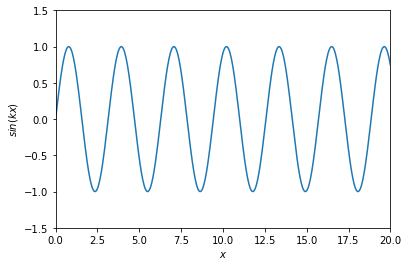

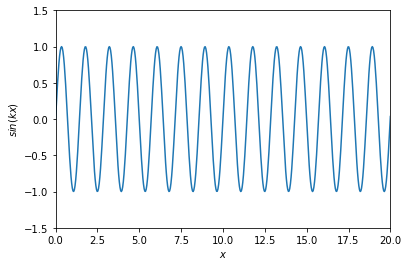

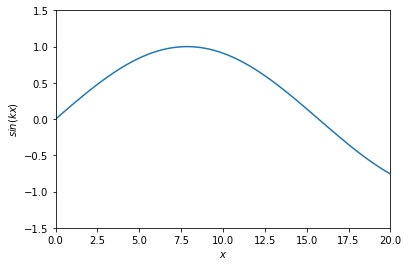

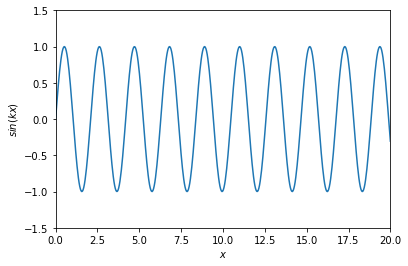

In [31]:
sinplot(2)
sinplot(4.4)
sinplot(0.2)
sinplot()

However, in this way it is often difficult to get a feeling for what is going on. What is really the effect of changing the value of $k$? Let us use the interact function:

In [32]:
from ipywidgets import interact

With two lines of code, we have gained the ability to directly interact with the parameter $k$ through a slider! Note that the syntax `k=(0.0,10.0)` means that the slider can be changed from 0 to 10. If we give a third parameter, we can specify the step size, by which the slider can change a value. 

The usual way to use `interact` is by adding it immediately when we define the function as follows:

In [33]:
@interact(k=(0.0,10.0))
def sinplot(k=3):
    myx = np.linspace(0.0,20.0,500)
    plt.xlim(0,20.0)
    plt.ylim(-1.5,1.5)
    plt.xlabel("$x$")
    plt.ylabel("$sin(k x)$")
    plt.plot(myx, np.sin(k * myx) )
    plt.show()



Note the special syntax with the `@` sign, which in Python is called a `decorator`.  With this syntax you essentially take the function definition in the following line and feed it into the interact function.

 
We can also change more than one variable with a slider, for instance:

In [34]:
@interact( k=(0.0,10.0),m=(-3.0,3.0,0.01), c=(-2.0,2.0,0.05))  
def sinplotlinearfit(k=3.0, m=1.0, c=0.0):
    myx = np.linspace(0.0,20.0,500)
    plt.xlim(0,20.0)
    plt.ylim(-1.5,1.5)
    plt.xlabel("$x$")
    plt.plot(myx, np.sin(k * myx) )
    plt.plot(myx, m * myx + c )
    plt.show()
    


Note that the different slider have different accuracy and limits. 

Of course, this does not only work for plotting functions, but also for any other function. For example let us spice up our fibonacci functions a bit:

In [35]:
@interact(n=(1,50),a=(-10.0,10.0), b=(-10.0,10.0))
def fibprintnew(n, a=0, b=1):
    fiblist = [a, b]
    while len(fiblist) < n:
        fiblist.append( fiblist[-1] + fiblist[-2])
    print(fiblist)